# Problem 2: CART-RF-ANN

### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)

## Importing the necessary libaries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings("ignore") 
my_colors = ['#d3d3d3','#d1a163','#7a7a7a','#d4a07d','#ffbf65','#202020']

## 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [6]:
df1=pd.read_csv("/content/download.csv")

In [7]:
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [9]:
df1.shape

(3000, 10)

In [10]:
df1.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [12]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
for column in df1[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df1[column].nunique())
    print(df1[column].value_counts().sort_values())
    print('\n')
    

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




In [14]:
df1.duplicated().sum()

139

In [15]:
dupl = df1.duplicated()
print('Number of duplicate rows = %d' % (dupl.sum()))
df1[dupl]


Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


## Univariate Analysis

In [16]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis,ax_skew)  =plt.subplots(nrows=3,sharex=True,gridspec_kw = {"height_ratios": (1.5, 7,3)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD,SKEWNESS,OUTLIERS OF DATA FOR "+ Name  , fontsize=15, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="#d3d3d3",ax=ax_box)
    ax_box.set(xlabel='')

    sns.despine(top=True,right=True,left=True) 
    sns.histplot(data,color='#d1a163',ax=ax_dis,kde=False)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='b', linestyle='-',linewidth=2)
    ax_dis.legend({'Mean':mean,'Median':median,'Mode':mode})
    
    sns.despine(top=True,right=True,left=True) 
    sns.distplot(data, color="m", kde=True,ax=ax_skew,label="Skewness : %.2f"%(data.skew()))
    ax_skew.legend(loc="best")
    plt.show()
    
    print("Description of " + Name)
    print("----------------------------------------------------------------------------")
    print(data.describe(),end=' ')    
    print('\n')
    print('\n')
    
    #Q1=df1[column].quantile(q=0.25)
    #Q3=df1[column].quantile(q=0.75)
    #print('Number of outliers in spending upper : ', int(df1[df1[column]>int(Q3)+1.5*(Q3-Q1)][column].count()))
    #print('Number of outliers in spending lower : ', df1[df1[column]<Q1-1.5*(Q3-Q1)][column].count())
    #print('% of Outlier in spending upper: ',round(df1[df1[column]>Q3+1.5*(Q3-Q1)][column].count()*100/len(df1)), '%')
    #print('% of Outlier in spending lower: ',round(df1[df1[column]<Q1-1.5*(Q3-Q1)][column].count()*100/len(df1)), '%')
    
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    #print('The IQR is',iqr)
    #print('The lower bound value is', lower)
    #print('The upper bound value is', upper)
    print("Outliers in " + column)
    print("----------------------------------------------------------------------------")
    print('No of Outlier in '+column+' upper: ',int(df1[df1[column]>int(upper)][column].count()))
    print('No of Outlier in '+column+' lower: ',int(df1[df1[column]<int(lower)][column].count()))
    print('% of Outlier in '+column+' upper: ',round(df1[df1[column]>int(upper)][column].count()*100/len(df1),2), '%')
    print('% of Outlier in '+column+' lower: ',round(df1[df1[column]<int(lower)][column].count()*100/len(df1),2), '%')
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1a = df[df[column] > upper]
    df2b = df[df[column] < lower]
    return print('Total number of outliers are', df1a.shape[0]+ df2b.shape[0]) 




In [17]:
df1.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

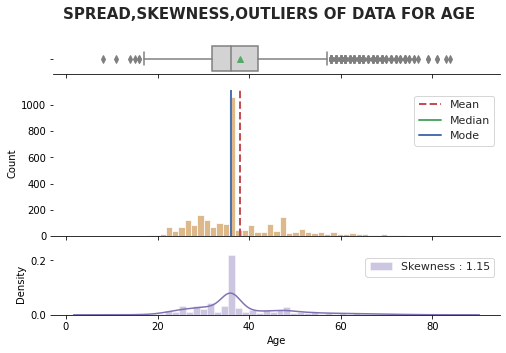

Description of AGE
----------------------------------------------------------------------------
count    3000.000000
mean       38.091000
std        10.463518
min         8.000000
25%        32.000000
50%        36.000000
75%        42.000000
max        84.000000
Name: Age, dtype: float64 



Outliers in Age
----------------------------------------------------------------------------
No of Outlier in Age upper:  198
No of Outlier in Age lower:  6
% of Outlier in Age upper:  6.6 %
% of Outlier in Age lower:  0.2 %
Total number of outliers are 204


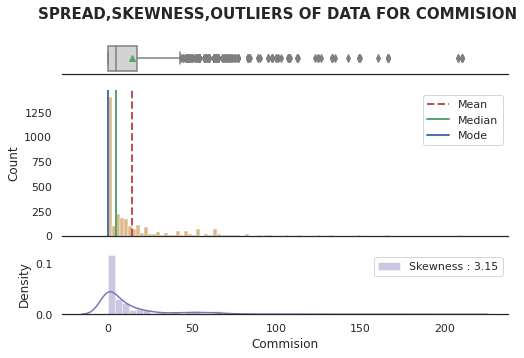

Description of COMMISION
----------------------------------------------------------------------------
count    3000.000000
mean       14.529203
std        25.481455
min         0.000000
25%         0.000000
50%         4.630000
75%        17.235000
max       210.210000
Name: Commision, dtype: float64 



Outliers in Commision
----------------------------------------------------------------------------
No of Outlier in Commision upper:  363
No of Outlier in Commision lower:  0
% of Outlier in Commision upper:  12.1 %
% of Outlier in Commision lower:  0.0 %
Total number of outliers are 362


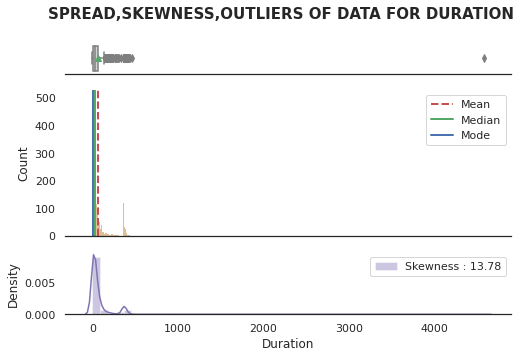

Description of DURATION
----------------------------------------------------------------------------
count    3000.000000
mean       70.001333
std       134.053313
min        -1.000000
25%        11.000000
50%        26.500000
75%        63.000000
max      4580.000000
Name: Duration, dtype: float64 



Outliers in Duration
----------------------------------------------------------------------------
No of Outlier in Duration upper:  382
No of Outlier in Duration lower:  0
% of Outlier in Duration upper:  12.73 %
% of Outlier in Duration lower:  0.0 %
Total number of outliers are 382


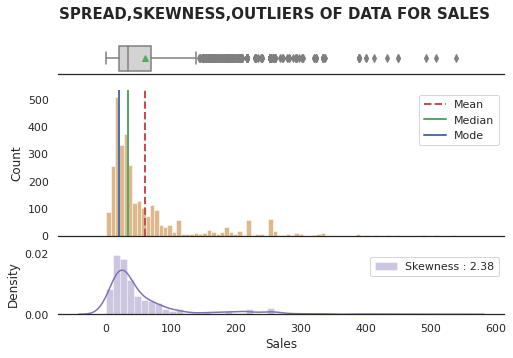

Description of SALES
----------------------------------------------------------------------------
count    3000.000000
mean       60.249913
std        70.733954
min         0.000000
25%        20.000000
50%        33.000000
75%        69.000000
max       539.000000
Name: Sales, dtype: float64 



Outliers in Sales
----------------------------------------------------------------------------
No of Outlier in Sales upper:  353
No of Outlier in Sales lower:  0
% of Outlier in Sales upper:  11.77 %
% of Outlier in Sales lower:  0.0 %
Total number of outliers are 353


In [18]:
list_col= ['Age','Commision','Duration','Sales']

for i in range(len(list_col)):
    dist_box(df1[list_col[i]])
    out_iqr(df1,list_col[i])
#Input the dataset and the required column

## Categorical Variables



In [19]:
def bivariateAnalysis_categorical(column):
    
    plt.figure(figsize=(6,5))
    print("Countplot of " + column)
    print("----------------------------------------------------------------------------")
    a=sns.countplot(data = df1[column], x = df1[column])
    for bar in a.patches:
            a.annotate(format(bar.get_height(),'.3f'),
                 (bar.get_x()+bar.get_width()/2,
                 bar.get_height()),ha='center',va='center',size=15,xytext=(0,8),textcoords='offset pixels')
            a.spines['top'].set_visible(False)
            a.spines['right'].set_visible(False)
    plt.tight_layout
    plt.show()
    
    plt.figure(figsize=(6,5))
    print("Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.boxplot(data = df1, x=df1[column],y=df1['Sales'], hue=df1['Claimed'])
    plt.show()
    


   

In [20]:
df1.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [21]:
df1_ct = df1.select_dtypes(include = ['object'])
lstcatcolumns = list(df1_ct.columns.values)
len(lstcatcolumns)

6

Countplot of Agency_Code
----------------------------------------------------------------------------


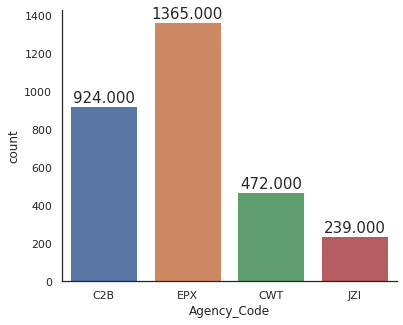

Boxplot of Agency_Code
----------------------------------------------------------------------------


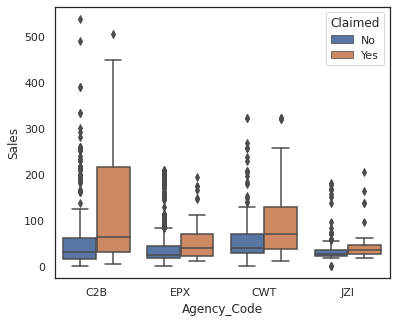

Countplot of Type
----------------------------------------------------------------------------


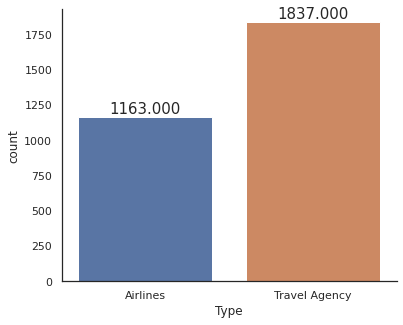

Boxplot of Type
----------------------------------------------------------------------------


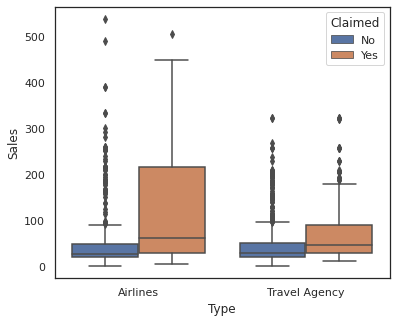

Countplot of Claimed
----------------------------------------------------------------------------


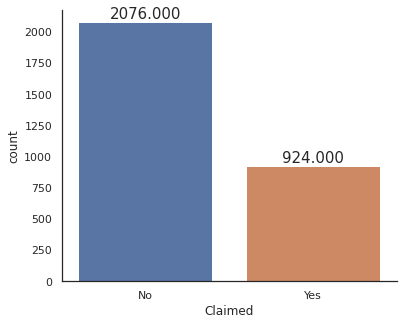

Boxplot of Claimed
----------------------------------------------------------------------------


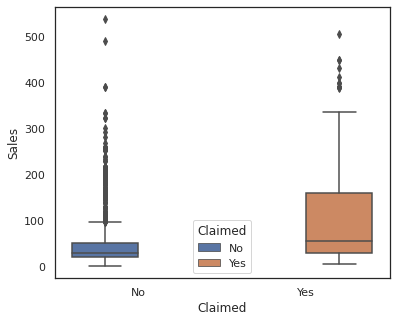

Countplot of Channel
----------------------------------------------------------------------------


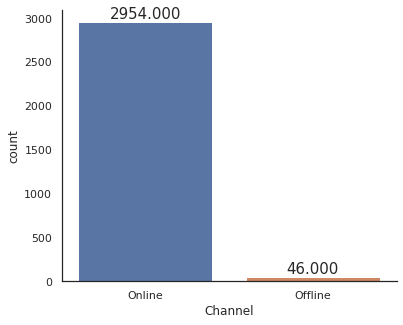

Boxplot of Channel
----------------------------------------------------------------------------


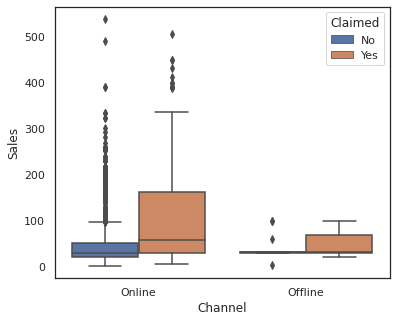

Countplot of Product Name
----------------------------------------------------------------------------


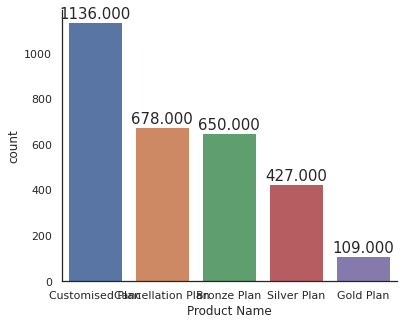

Boxplot of Product Name
----------------------------------------------------------------------------


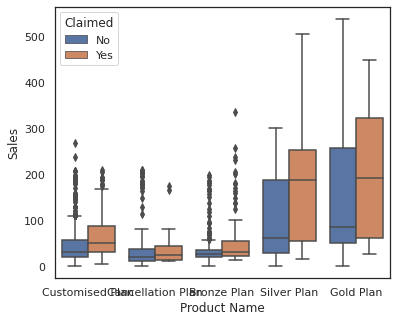

Countplot of Destination
----------------------------------------------------------------------------


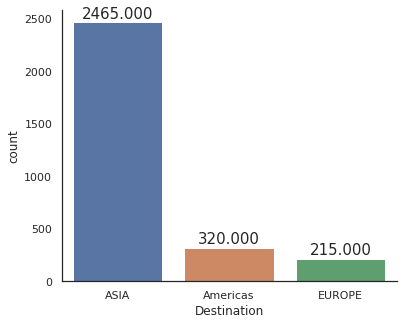

Boxplot of Destination
----------------------------------------------------------------------------


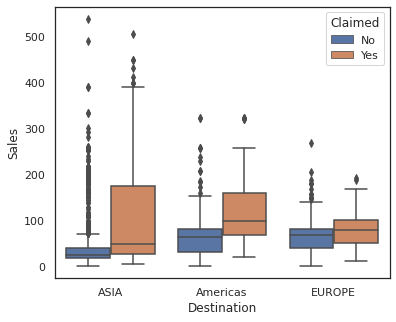

In [22]:
for x in lstcatcolumns:
    bivariateAnalysis_categorical(x)

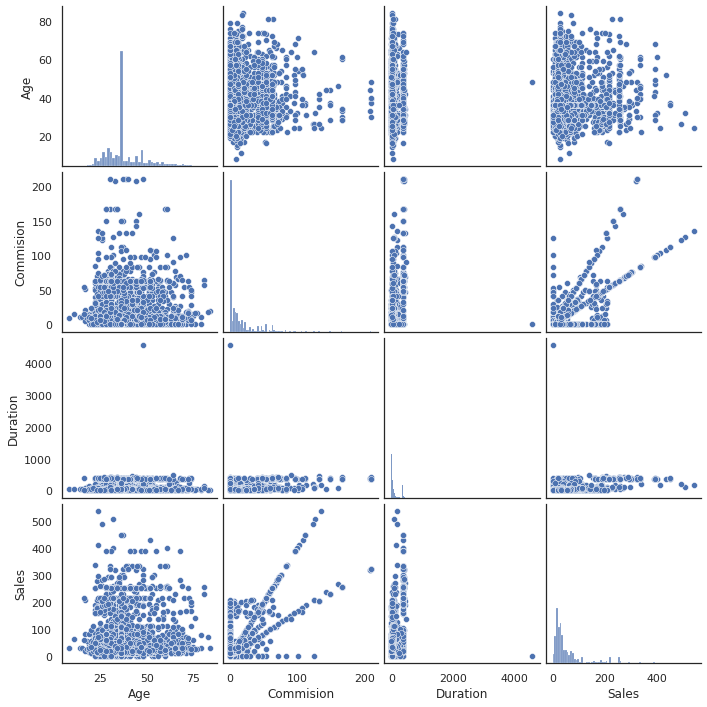

In [23]:
sns.pairplot(df1[['Age', 'Commision', 
    'Duration', 'Sales']])

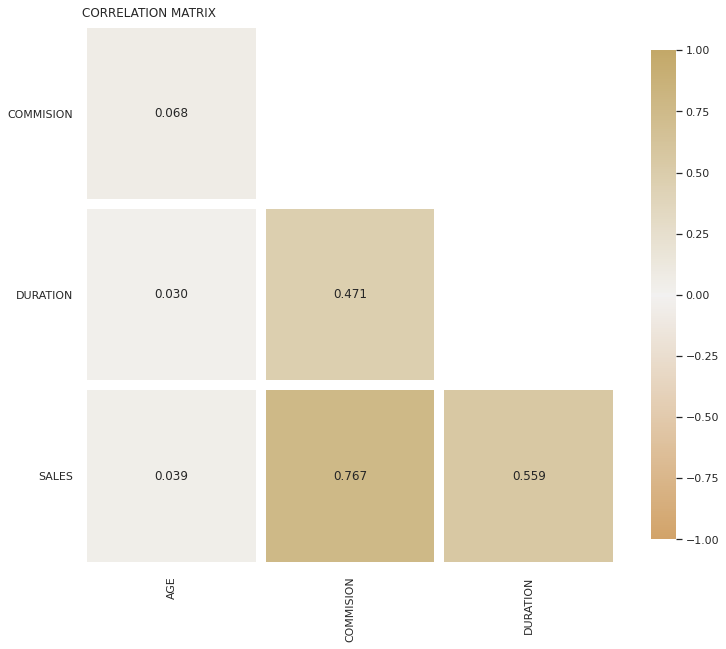

In [24]:
items = df1
items_corr=items.corr()


fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(items_corr, dtype=bool))
mask = mask[1:, :-1]
corr = items.corr().iloc[1:,:-1].copy()

cmap1 = sns.diverging_palette(51,65, 62,70, as_cmap=True)

_=sns.heatmap(corr, mask=mask, annot=True, fmt=".3f", 
           linewidths=9, cmap=cmap1, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .9}, square=False)
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0
           
          )
plt.xticks(plt.xticks()[0], labels=xticks,rotation=90)
title = 'CORRELATION MATRIX';
plt.title(title, fontsize=12,loc='left');



## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [25]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan',
                         'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


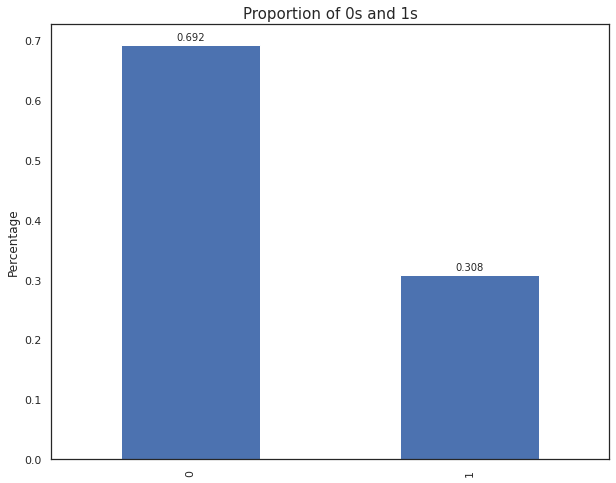

In [26]:
plt.figure(figsize=(10,8))
prop=df1.Claimed.value_counts(normalize=True)
prop_plt=prop.plot(kind='bar')
plt.ylabel("Percentage")
plt.title("Proportion of 0s and 1s",fontdict={'fontsize':15})
for bar in prop_plt.patches:
            prop_plt.annotate(format(bar.get_height(),'.3f'),
                 (bar.get_x()+bar.get_width()/2,
                 bar.get_height()),ha='center',va='center',size=10,xytext=(0,8),textcoords='offset pixels')

In [27]:
X = df1.drop("Claimed", axis=1)

y = df1.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [28]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.30, random_state = 123)

In [29]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (2100, 9)
X_test (900, 9)
y_train (2100,)
y_test (900,)


## Model - CART

In [30]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [5,7,9],
    'min_samples_leaf': [20,80,150], 
    'min_samples_split': [60,240,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [31]:
grid_search_dtcl.fit(X_train, y_train)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 240}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=240,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [32]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [10,15,20], 
    'min_samples_split': [150,170,190,210,220,240],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [33]:
grid_search_dtcl.fit(X_train, y_train)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 150}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [34]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3,3.5,4,4.5,5],
    'min_samples_leaf': [5,7,9,10,12], 
    'min_samples_split': [100,120,140,160],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [35]:
grid_search_dtcl.fit(X_train, y_train)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 100}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [36]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [37]:
#from sklearn.tree import export_graphviz
# from io import StringIO  
# from IPython.display import Image  
# import pydotplus
# import graphviz
# dot_data = StringIO()
# export_graphviz(best_grid_dtcl, out_file=dot_data, filled  = True, rounded = True, feature_names=X_train.columns)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('tree.png')
# Image(graph.create_png())

In [38]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.565592
Sales         0.239884
Product Name  0.098042
Duration      0.044687
Commision     0.034108
Age           0.017687
Type          0.000000
Channel       0.000000
Destination   0.000000


In [39]:
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)


In [40]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.402490,0.597510
1,0.814286,0.185714
2,0.824561,0.175439
3,0.119048,0.880952
4,0.913174,0.086826


## Model - Random Forest

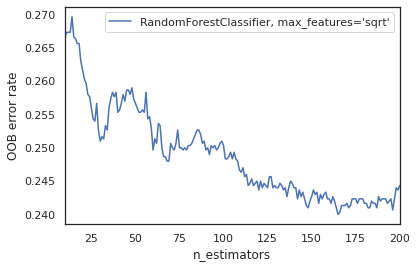

In [41]:
from collections import OrderedDict
from sklearn.datasets import make_classification

ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="auto",
                               random_state=123)),
    
]

##### Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [42]:
param_grid_rfcl = {
    'max_depth': [15,18],#20,30,40
    #'max_features': [5,5.5,6],## 7,8,9
    'max_features': [3,3.5,4],## 7,8,9
    'min_samples_leaf': [15,15.5,16],## 50,100
    'min_samples_split': [60,60.5], ## 60,70
    'n_estimators': [30] ## 60,120,130
}

rfcl = RandomForestClassifier(random_state=123)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [43]:
grid_search_rfcl.fit(X_train, y_train)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

{'max_depth': 15, 'max_features': 4, 'min_samples_leaf': 15, 'min_samples_split': 60, 'n_estimators': 30}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [44]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [45]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.450387,0.549613
1,0.856220,0.143780
2,0.871825,0.128175
3,0.197312,0.802688
4,0.876587,0.123413


In [46]:
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.339854
Product Name  0.210140
Sales         0.184909
Duration      0.091402
Commision     0.072283
Age           0.052721
Type          0.036650
Destination   0.011473
Channel       0.000568


## Model - Neural Network

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [48]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,150,200], # 50, 200
    'max_iter': [200,250], #500
    'solver': ['adam'], #sgd
    'tol': [0.001],
}

nncl = MLPClassifier(random_state=123)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [49]:
grid_search_nncl.fit(X_train_scaled, y_train)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=150, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='adam',
              tol=0.001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [50]:
ytrain_predict_nncl = best_grid_nncl.predict(X_train_scaled)
ytest_predict_nncl = best_grid_nncl.predict(X_test_scaled
                                           )

In [51]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test_scaled)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.495297,0.504703
1,0.777203,0.222797
2,0.838868,0.161132
3,0.181898,0.818102
4,0.918323,0.081677


## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.

# Performance Metrics
## CART :- Train

In [52]:
confusion_matrix(y_train, ytrain_predict_dtcl)

array([[1279,  165],
       [ 277,  379]])

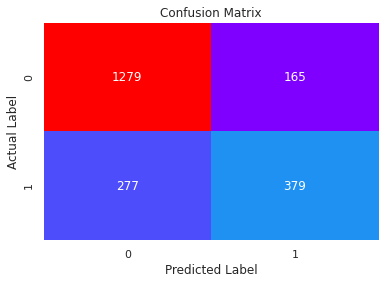

In [53]:
# Get the confusion matrix on the train data
confusion_matrix(y_train, ytrain_predict_dtcl)
sns.heatmap(confusion_matrix(y_train, ytrain_predict_dtcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [54]:
#Train Accuracy
cart_train_acc=best_grid_dtcl.score(X_train,y_train) 
cart_train_acc

0.7895238095238095

In [55]:
cart_perf=classification_report(y_train, ytrain_predict_dtcl,output_dict=True)
print(classification_report(y_train, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1444
           1       0.70      0.58      0.63       656

    accuracy                           0.79      2100
   macro avg       0.76      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



AUC: 0.829


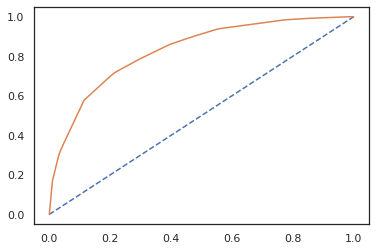

In [56]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

In [57]:
df=pd.DataFrame(cart_perf).transpose()
cart_train_f1=round(df.loc["1"][2],3)
cart_train_recall=round(df.loc["1"][1],3)
cart_train_precision=round(df.loc["1"][0],3)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.697
cart_train_recall  0.578
cart_train_f1  0.632


## CART :- Test



In [58]:
confusion_matrix(y_test, ytest_predict_dtcl)

array([[559,  73],
       [112, 156]])

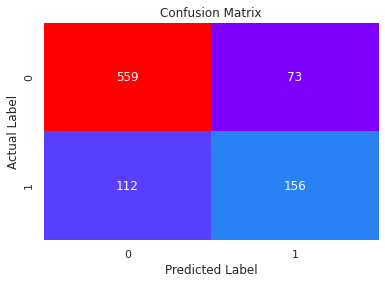

In [59]:
# Get the confusion matrix on the test data
confusion_matrix(y_test, ytest_predict_dtcl)
sns.heatmap(confusion_matrix(y_test, ytest_predict_dtcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [60]:
cart_test_acc=best_grid_dtcl.score(X_test,y_test)
cart_test_acc

0.7944444444444444

In [61]:
cart_perf=classification_report(y_test, ytest_predict_dtcl,output_dict=True)
print(classification_report(y_test, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       632
           1       0.68      0.58      0.63       268

    accuracy                           0.79       900
   macro avg       0.76      0.73      0.74       900
weighted avg       0.79      0.79      0.79       900



AUC: 0.817


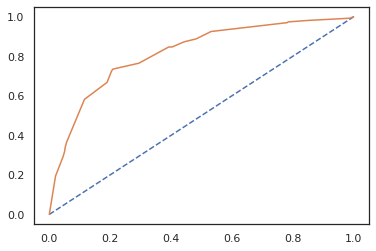

In [62]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [63]:
df=pd.DataFrame(cart_perf).transpose()
cart_test_f1=round(df.loc["1"][2],3)
cart_test_recall=round(df.loc["1"][1],3)
cart_test_precision=round(df.loc["1"][0],3)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.681
cart_test_recall  0.582
cart_test_f1  0.628


## Random Forest : - Train

In [64]:
 confusion_matrix(y_train,ytrain_predict_rfcl)

array([[1306,  138],
       [ 291,  365]])

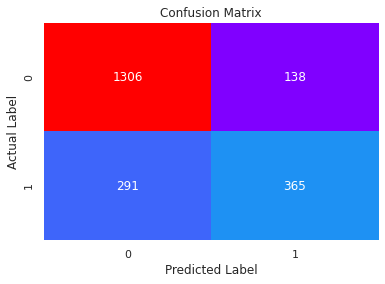

In [65]:
# Get the confusion matrix on the train data
confusion_matrix(y_train,ytrain_predict_rfcl)
sns.heatmap(confusion_matrix(y_train,ytrain_predict_rfcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [66]:
rf_train_acc=best_grid_rfcl.score(X_train,y_train) 
rf_train_acc

0.7957142857142857

In [67]:
rf_perf=classification_report(y_train, ytrain_predict_rfcl,output_dict=True)
print(classification_report(y_train,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1444
           1       0.73      0.56      0.63       656

    accuracy                           0.80      2100
   macro avg       0.77      0.73      0.74      2100
weighted avg       0.79      0.80      0.79      2100



Area under Curve is 0.8531924574353085


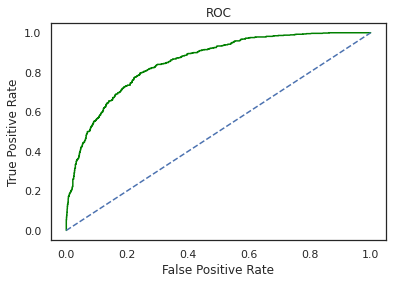

In [68]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [69]:
df=pd.DataFrame(rf_perf).transpose()
rf_train_precision=round(df.loc["1"][0],3)
rf_train_recall=round(df.loc["1"][1],3)
rf_train_f1=round(df.loc["1"][2],3)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.726
rf_train_recall  0.556
rf_train_f1  0.63


## Random Forest :- Test

In [70]:
confusion_matrix(y_test,ytest_predict_rfcl) #test

array([[561,  71],
       [114, 154]])

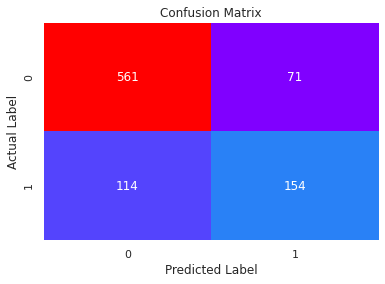

In [71]:
# Get the confusion matrix on the test data
confusion_matrix(y_test,ytest_predict_rfcl)
sns.heatmap(confusion_matrix(y_test,ytest_predict_rfcl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [72]:
rf_test_acc=best_grid_rfcl.score(X_test,y_test)
rf_test_acc

0.7944444444444444

In [73]:
rf_perf=classification_report(y_test, ytest_predict_rfcl,output_dict=True)
print(classification_report(y_test, ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       632
           1       0.68      0.57      0.62       268

    accuracy                           0.79       900
   macro avg       0.76      0.73      0.74       900
weighted avg       0.79      0.79      0.79       900



Area under Curve is 0.8345869544681654


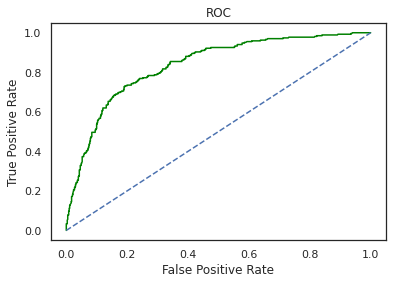

In [74]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [75]:
df=pd.DataFrame(rf_perf).transpose()
rf_test_precision=round(df.loc["1"][0],3)
rf_test_recall=round(df.loc["1"][1],3)
rf_test_f1=round(df.loc["1"][2],3)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.684
rf_test_recall  0.575
rf_test_f1  0.625


## Neural network : - Train

In [76]:
nn_perf=classification_report(y_train, ytrain_predict_nncl,output_dict=True)
confusion_matrix(y_train,ytrain_predict_nncl)

array([[1279,  165],
       [ 301,  355]])

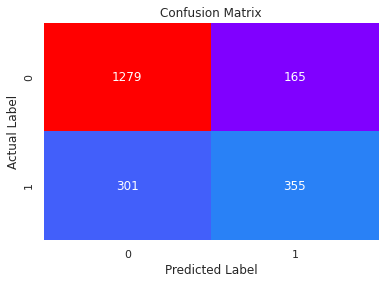

In [77]:
# Get the confusion matrix on the train data
confusion_matrix(y_train,ytrain_predict_nncl)
sns.heatmap(confusion_matrix(y_train,ytrain_predict_nncl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [78]:
nn_train_acc=best_grid_nncl.score(X_train_scaled,y_train) 
nn_train_acc

0.7780952380952381

In [79]:
print(classification_report(y_train,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1444
           1       0.68      0.54      0.60       656

    accuracy                           0.78      2100
   macro avg       0.75      0.71      0.72      2100
weighted avg       0.77      0.78      0.77      2100



Area under Curve is 0.8235053797040741


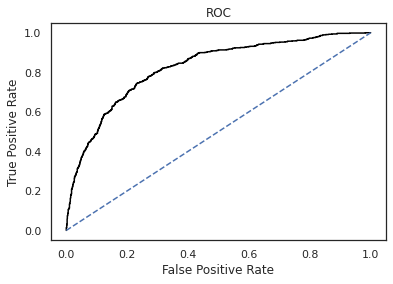

In [80]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train,best_grid_nncl.predict_proba(X_train_scaled)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train,best_grid_nncl.predict_proba(X_train_scaled)[:,1])
print('Area under Curve is', nn_train_auc)

In [81]:
df=pd.DataFrame(nn_perf).transpose()
nn_train_precision=round(df.loc["1"][0],3)
nn_train_recall=round(df.loc["1"][1],3)
nn_train_f1=round(df.loc["1"][2],3)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.683
nn_train_recall  0.541
nn_train_f1  0.604


## Neural Network : - Test

In [82]:
confusion_matrix(y_test,ytest_predict_nncl)#test

array([[558,  74],
       [123, 145]])

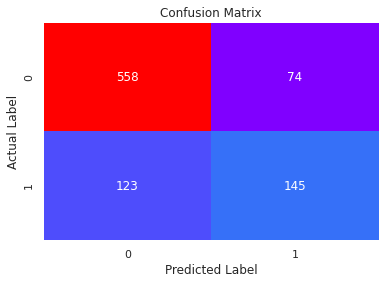

In [83]:
# Get the confusion matrix on the test data
confusion_matrix(y_test,ytest_predict_nncl)
sns.heatmap(confusion_matrix(y_test,ytest_predict_nncl),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [84]:
nn_test_acc=best_grid_nncl.score(X_test_scaled,y_test)
nn_test_acc

0.7811111111111111

In [85]:
nn_perf=classification_report(y_train, ytrain_predict_nncl,output_dict=True)
print(classification_report(y_test,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       632
           1       0.66      0.54      0.60       268

    accuracy                           0.78       900
   macro avg       0.74      0.71      0.72       900
weighted avg       0.77      0.78      0.77       900



Area under Curve is 0.8316497024371813


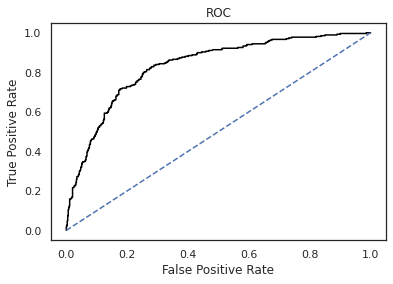

In [86]:
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid_nncl.predict_proba(X_test_scaled)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid_nncl.predict_proba(X_test_scaled)[:,1])
print('Area under Curve is', nn_test_auc)

In [87]:
df=pd.DataFrame(nn_perf).transpose()
nn_test_precision=round(df.loc["1"][0],3)
nn_test_recall=round(df.loc["1"][1],3)
nn_test_f1=round(df.loc["1"][2],3)
print ('nn_test_precision ',nn_train_precision)
print ('nn_test_recall ',nn_train_recall)
print ('nn_test_f1 ',nn_train_f1)

nn_test_precision  0.683
nn_test_recall  0.541
nn_test_f1  0.604


## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.


In [92]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
data.columns=pd.MultiIndex.from_arrays([['CART','CART','Random Forest','Random Forest','Neural Network','Neural Network'],['Train','Test','Train','Test','Train','Test']])
round(data,3)

CART        Random Forest        Neural Network       
           Train   Test         Train   Test          Train   Test
Accuracy   0.790  0.794         0.796  0.794          0.778  0.781
AUC        0.829  0.817         0.853  0.835          0.824  0.832
Recall     0.578  0.582         0.556  0.575          0.541  0.541
Precision  0.697  0.681         0.726  0.684          0.683  0.683
F1 Score   0.632  0.628         0.630  0.625          0.604  0.604

index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
data.columns=pd.MultiIndex.from_arrays([['CART','CART','Random Forest','Random Forest','Neural Network','Neural Network'],['Train','Test','Train','Test','Train','Test']])
round(data,3)

## ROC Curve for the 3 models on Train data

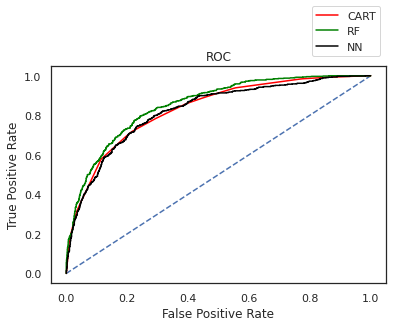

In [89]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## ROC Curve for the 3 models on Test data

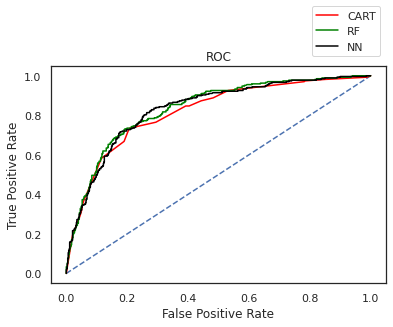

In [90]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

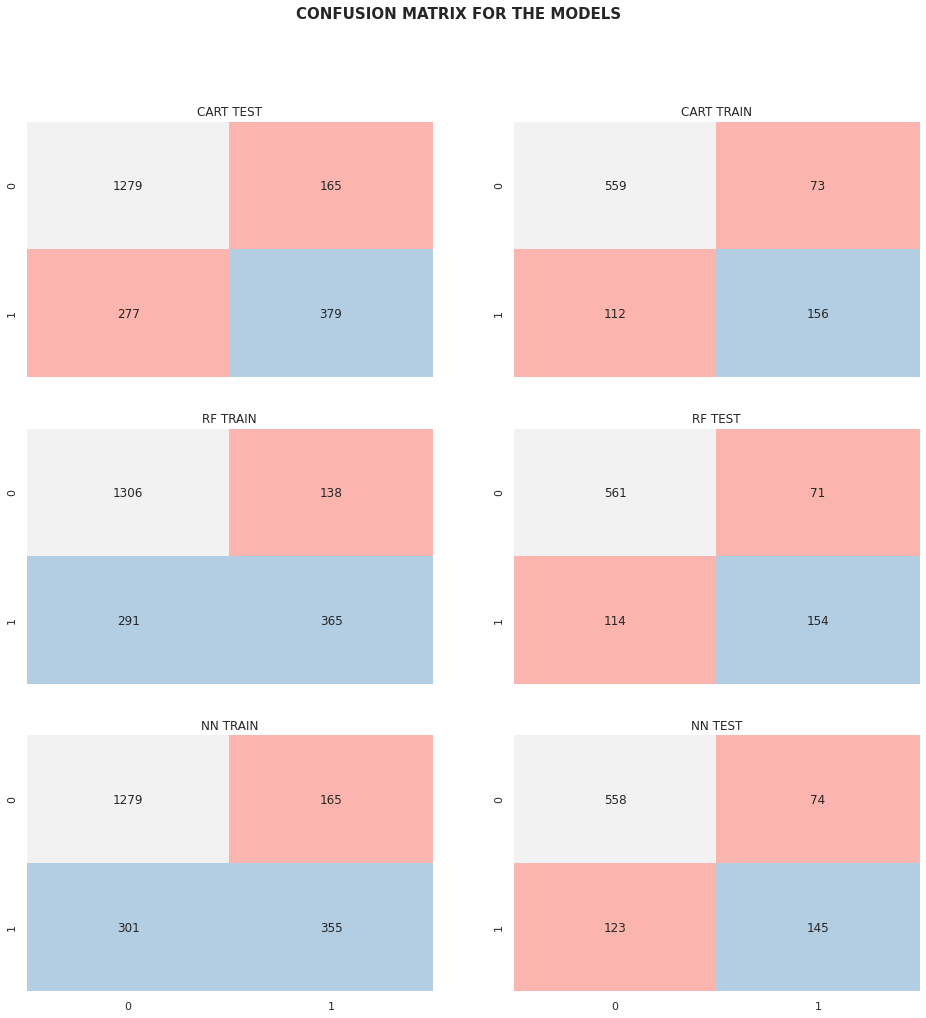

In [91]:
fig, axesq = plt.subplots(3, 2, sharex=True, figsize=(16,16))
fig.suptitle('CONFUSION MATRIX FOR THE MODELS',fontsize=15, fontweight='bold')
a=sns.heatmap(ax=axesq[0,0],data=confusion_matrix(y_train, ytrain_predict_dtcl),annot=True, fmt='d',cbar=False, cmap='Pastel1',)
a.title.set_text('CART TEST')
b=sns.heatmap(ax=axesq[0,1],data=confusion_matrix(y_test, ytest_predict_dtcl),annot=True, fmt='d',cbar=False, cmap='Pastel1')
b.title.set_text('CART TRAIN')
c=sns.heatmap(ax=axesq[1,0],data=confusion_matrix(y_train,ytrain_predict_rfcl),annot=True, fmt='d',cbar=False, cmap='Pastel1')
c.title.set_text('RF TRAIN')
d=sns.heatmap(ax=axesq[1,1],data=confusion_matrix(y_test,ytest_predict_rfcl),annot=True, fmt='d',cbar=False, cmap='Pastel1')
d.title.set_text('RF TEST')
e=sns.heatmap(ax=axesq[2,0],data=confusion_matrix(y_train,ytrain_predict_nncl),annot=True, fmt='d',cbar=False, cmap='Pastel1')
e.title.set_text('NN TRAIN')
f=sns.heatmap(ax=axesq[2,1],data=confusion_matrix(y_test,ytest_predict_nncl),annot=True, fmt='d',cbar=False, cmap='Pastel1')
f.title.set_text('NN TEST')
